# 1. Повнозв'язані нейронні мережі
### Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:
data = pd.read_csv("WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
X = data.drop(['Id','quality'], axis=1)
y = data.quality

In [4]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y)

In [7]:
X_train.shape

(800, 11)

In [8]:
 data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
lb = LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)

In [12]:
y_train[:2]

574    7
895    6
Name: quality, dtype: int64

In [13]:
trainY[:2]

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0]])

In [14]:
model = Sequential()
model.add(Dense(256, input_shape=(11,), activation="sigmoid"))#1th hiddenlayer
model.add(Dense(128, activation="sigmoid"))#2th hiddenlayer
model.add(Dense(6, activation="softmax"))#outputlayer

In [15]:
print("[INFO] training network...")
sgd = SGD(0.1)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
    metrics=["accuracy"])
H = model.fit(X_train, trainY, validation_data=(X_test, testY),
    epochs=200, batch_size=8)

[INFO] training network...
Epoch 1/200
100/100 [==============================] - 1s 3ms/step - loss: 1.3576 - accuracy: 0.4000 - val_loss: 1.2491 - val_accuracy: 0.4227
Epoch 2/200
100/100 [==============================] - 0s 2ms/step - loss: 1.2471 - accuracy: 0.4087 - val_loss: 1.1941 - val_accuracy: 0.4227
Epoch 3/200
100/100 [==============================] - 0s 2ms/step - loss: 1.2210 - accuracy: 0.4038 - val_loss: 1.1876 - val_accuracy: 0.4227
Epoch 4/200
100/100 [==============================] - 0s 2ms/step - loss: 1.2134 - accuracy: 0.4075 - val_loss: 1.2087 - val_accuracy: 0.4023
Epoch 5/200
100/100 [==============================] - 0s 2ms/step - loss: 1.1989 - accuracy: 0.4437 - val_loss: 1.2492 - val_accuracy: 0.4023
Epoch 6/200
100/100 [==============================] - 0s 2ms/step - loss: 1.2040 - accuracy: 0.4075 - val_loss: 1.1939 - val_accuracy: 0.4023
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 1.1886 - accuracy: 0.4363 - val_loss: 1.

In [16]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=8)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
43/43 [==============================] - 0s 807us/step
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.67      0.83      0.74       145
           6       0.59      0.66      0.63       138
           7       0.60      0.14      0.23        43
           8       0.00      0.00      0.00         5

    accuracy                           0.64       343
   macro avg       0.31      0.27      0.27       343
weighted avg       0.60      0.64      0.59       343



C:\Users\Sofi\opencv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sofi\opencv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sofi\opencv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


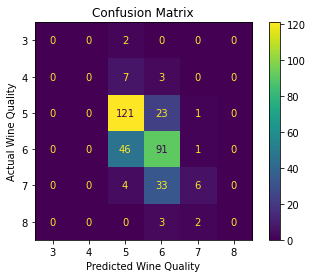

In [17]:
cm = confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=lb.classes_)
cmd_obj.plot()
cmd_obj.ax_.set(title= "Confusion Matrix", xlabel='Predicted Wine Quality', ylabel='Actual Wine Quality')
plt.show()

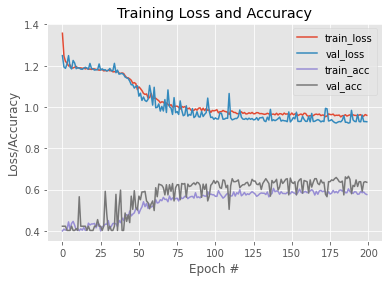

In [18]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 200), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 200), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 200), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 200), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

### У лабораторній роботі 1  f1-score 0.65 у класифікатора випадкового лісу (RF). При використанны fully connected feed-forward network середнє f1-score 0.64. Результати відрізняються незначно

# 2. Згорткові нейронні мережі
### Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

In [2]:
import cv2
import os
from skimage.transform import resize
from skimage.io import imread

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 as cv

In [3]:
classes=['apple', 'banana', 'cherry', 'chickoo', 'grapes', 'kiwi','mango', 'orange', 'strawberry']
path='C:\\Users\\Sofi\\opencv\\Scripts\\master_study\\Data_analysis\\images' 

datagen = ImageDataGenerator(rescale = 1.0/255.).flow_from_directory(path,target_size=(64, 64),shuffle=0) #читаємо дані з папки, розмір зображень ставимо 64 на 64, не перемішуємо

Found 359 images belonging to 9 classes.


In [20]:
x=np.concatenate([datagen.next()[0] for i in range(datagen.__len__())]) #зберігаємо сюди необроблені пікселі зображень, наші вхідні дані
y=np.concatenate([datagen.next()[1] for i in range(datagen.__len__())])#зберігаємо сюди мітки класів зображень, наші вихідні дані

In [21]:
x.shape

(359, 64, 64, 3)

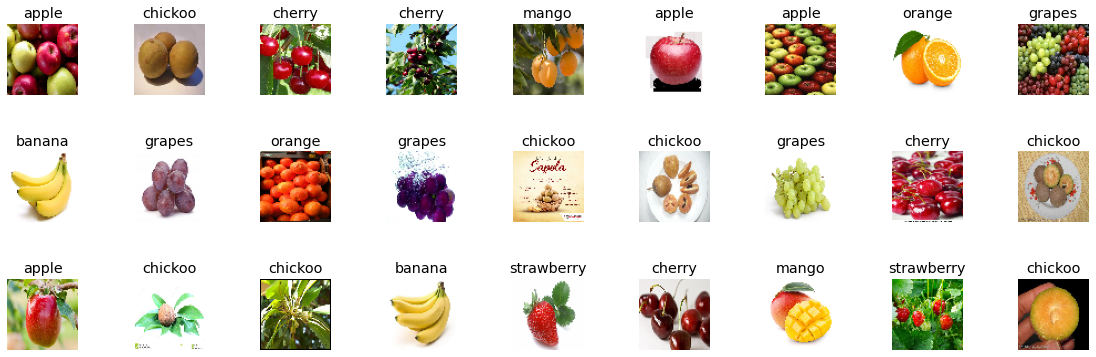

In [22]:
plt.figure(figsize=(20, 6))
plt.rcParams['font.size'] = 10
for i in range(27):
    plt.subplot(3,9,i+1)
    plt.axis('off')
    j = int(np.random.randint(0,x.shape[0],1))
    plt.imshow(x[j])
    plt.title(classes[int(*np.where(y[j]!=0))])
    plt.subplots_adjust(hspace=.8)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3)

In [25]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))###(висота_зображення, ширина_зображення, канали_кольору)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(9,activation = "softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)       

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=8,validation_split=0.3)# train the network. 

Epoch 1/100
22/22 [==============================] - 2s 62ms/step - loss: 2.2195 - accuracy: 0.1371 - val_loss: 2.1969 - val_accuracy: 0.0921
Epoch 2/100
22/22 [==============================] - 1s 57ms/step - loss: 2.1777 - accuracy: 0.0914 - val_loss: 2.0484 - val_accuracy: 0.3553
Epoch 3/100
22/22 [==============================] - 1s 56ms/step - loss: 1.9920 - accuracy: 0.2000 - val_loss: 1.8759 - val_accuracy: 0.2105
Epoch 4/100
22/22 [==============================] - 1s 59ms/step - loss: 1.8434 - accuracy: 0.3086 - val_loss: 1.8365 - val_accuracy: 0.3026
Epoch 5/100
22/22 [==============================] - 1s 59ms/step - loss: 1.7357 - accuracy: 0.3086 - val_loss: 1.6539 - val_accuracy: 0.2763
Epoch 6/100
22/22 [==============================] - 1s 59ms/step - loss: 1.6950 - accuracy: 0.3029 - val_loss: 1.6030 - val_accuracy: 0.3026
Epoch 7/100
22/22 [==============================] - 1s 60ms/step - loss: 1.6339 - accuracy: 0.3486 - val_loss: 1.5671 - val_accuracy: 0.3553
Epoch 

4/4 - 0s - loss: 4.7598 - accuracy: 0.4537 - 126ms/epoch - 31ms/step


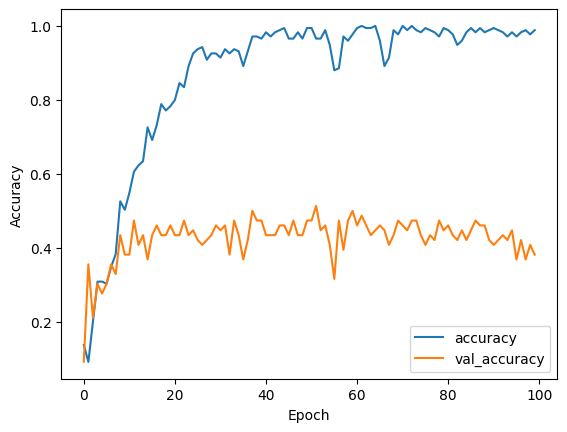

In [30]:
plt.style.use("default")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [31]:
print(test_acc)

0.45370370149612427


In [32]:
y_pred = np.argmax(model.predict(X_test), axis=-1)#зберігаємо передбачення, вибираємо найбільше значення вектора ймовірностей(позицію) 

4/4 [==============================] - 0s 29ms/step


In [33]:
print(classification_report(y_test.argmax(axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.26      0.42      0.32        12
           1       0.50      0.42      0.45        12
           2       0.56      0.42      0.48        12
           3       0.50      0.92      0.65        12
           4       0.62      0.67      0.64        12
           5       0.67      0.33      0.44        12
           6       0.14      0.17      0.15        12
           7       0.56      0.42      0.48        12
           8       0.67      0.33      0.44        12

    accuracy                           0.45       108
   macro avg       0.50      0.45      0.45       108
weighted avg       0.50      0.45      0.45       108



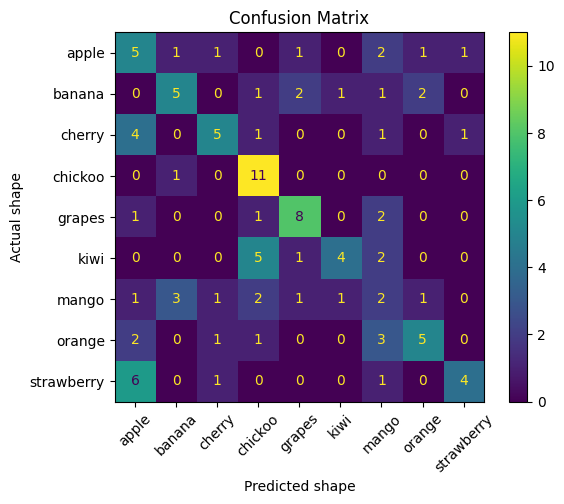

In [34]:
plt.style.use("default")

cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd_obj.plot(xticks_rotation=45)
cmd_obj.ax_.set(title= "Confusion Matrix", xlabel='Predicted shape', ylabel='Actual shape')
plt.show()

# 3. Рекурентні нейронні мережі
### Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш. 

In [4]:
train_data = pd.read_csv(r"Medical-Abstracts-TC-Corpus-main/medical_tc_train.csv")
test_data = pd.read_csv(r"Medical-Abstracts-TC-Corpus-main/medical_tc_test.csv")

classes = pd.read_csv(r"Medical-Abstracts-TC-Corpus-main/medical_tc_labels.csv")

In [5]:
classes = classes.condition_name

In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
nltk.download('all')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Sofi\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

In [7]:
def clean_text(text):
    
    clear_text = []
    for i in range(len(text)):
        
        if i in [10,100,1000,2000,3000]: 
            print (i)

        r = re.sub('[^a-zA-Z]', ' ', text[i])
        r = r.lower()
        r = r.split()
        r = [word for word in r if (word not in stopwords.words('english') and len(word)>2)]
        r = [lemmatizer.lemmatize(word) for word in r]
        r = ' '.join(r)
        clear_text.append(r)
    return clear_text

train_data['clear_medical_abstract'] = clean_text(list(train_data['medical_abstract']))
test_data['clear_medical_abstract'] = clean_text(list(test_data['medical_abstract']))


10
100
1000
2000
3000
10
100
1000
2000


In [65]:
X_train = train_data['clear_medical_abstract'].values
X_test = test_data['clear_medical_abstract'].values

y_train = train_data.condition_label
y_test =  test_data.condition_label

In [50]:
# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten,Dropout, SimpleRNN,LSTM,GRU
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.core import SpatialDropout1D

In [66]:
# Tokenize the texts and create a vocabulary
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

# Pad the sequences so they all have the same length
X_train = pad_sequences(sequences, maxlen=150)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=150)

# Create one-hot encoded labels
y_train = pd.get_dummies(train_data.condition_label).values
y_test = pd.get_dummies(test_data.condition_label).values

In [61]:
# Build the model
model = Sequential()
model.add(Embedding(1000, 64, input_length=150))
model.add(SpatialDropout1D(0.3))
#model.add(SimpleRNN(64,return_sequences=False))#acc=0.35
#model.add(GRU(64,return_sequences=False))#acc=0.45
model.add(LSTM(64,return_sequences=False))
model.add(layers.Dropout(0.3))
#model.add(LSTM(32))
#model.add(layers.Dropout(0.2))
model.add(Dense(5, activation='softmax'))


opt = keras.optimizers.Adam(learning_rate=0.001)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(X_train, y_train, batch_size=16, epochs=20,validation_split=0.2, verbose=1,callbacks=[early_stop])

Epoch 1/20
578/578 [==============================] - 48s 81ms/step - loss: 1.2812 - accuracy: 0.4785 - val_loss: 1.1410 - val_accuracy: 0.5459
Epoch 2/20
578/578 [==============================] - 44s 76ms/step - loss: 1.0800 - accuracy: 0.5779 - val_loss: 1.0667 - val_accuracy: 0.5753
Epoch 3/20
578/578 [==============================] - 46s 79ms/step - loss: 0.9928 - accuracy: 0.6186 - val_loss: 1.0578 - val_accuracy: 0.5649
Epoch 4/20
578/578 [==============================] - 43s 75ms/step - loss: 0.9505 - accuracy: 0.6268 - val_loss: 1.0354 - val_accuracy: 0.5848
Epoch 5/20
578/578 [==============================] - 45s 77ms/step - loss: 0.9168 - accuracy: 0.6402 - val_loss: 1.0268 - val_accuracy: 0.5805
Epoch 6/20
578/578 [==============================] - 39s 68ms/step - loss: 0.8877 - accuracy: 0.6472 - val_loss: 1.0319 - val_accuracy: 0.5749
Epoch 7/20
578/578 [==============================] - 39s 68ms/step - loss: 0.8764 - accuracy: 0.6522 - val_loss: 1.0345 - val_accuracy:

91/91 - 2s - loss: 1.1382 - accuracy: 0.5564 - 2s/epoch - 25ms/step


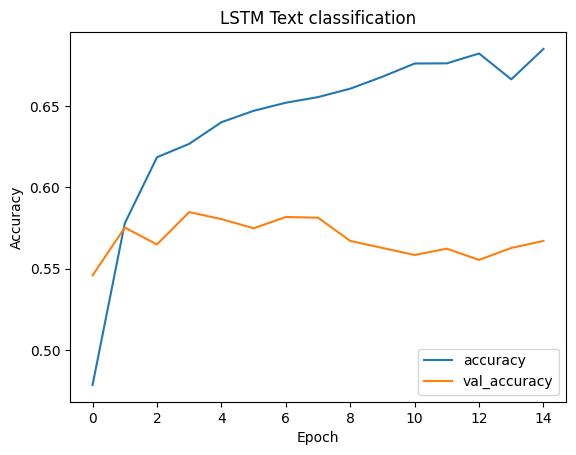

In [68]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("LSTM Text classification")

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [67]:
y_pred = np.argmax(model.predict(X_test), axis=-1)


91/91 [==============================] - 3s 26ms/step


In [69]:
print(classification_report(y_test.argmax(axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       633
           1       0.43      0.45      0.44       299
           2       0.48      0.40      0.44       385
           3       0.64      0.74      0.69       610
           4       0.48      0.38      0.42       961

    accuracy                           0.56      2888
   macro avg       0.53      0.55      0.54      2888
weighted avg       0.54      0.56      0.55      2888



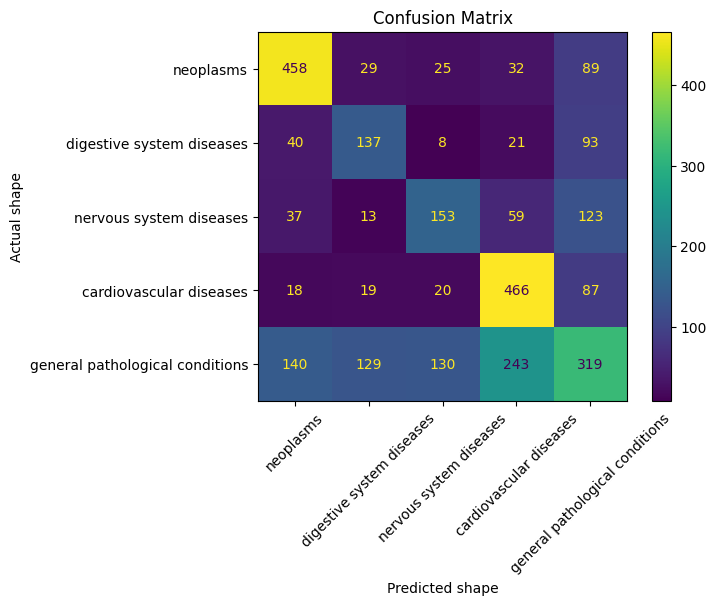

In [57]:
plt.style.use("default")

cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd_obj.plot(xticks_rotation=45)
cmd_obj.ax_.set(title= "Confusion Matrix", xlabel='Predicted shape', ylabel='Actual shape')

plt.show()

In [ ]:
### При використанні knn точність була 0.56, з RNN - теж 0.56. 